<a href="https://colab.research.google.com/github/viniciusrpb/cic0269_natural_language_processing/blob/main/cap10_metricas_concordancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 10 - Construção e Anotação de Corpos de Textos


Fontes:

[Sklearn Cohen's Kappa](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html)

[Fast Krippendorff](https://github.com/pln-fing-udelar/fast-krippendorff)


## 10.1 - Ferramentas de anotação

Um processo de anotação organizado e que facilite a tarefa de rotulação pelos anotadores, como também o gerente acompanhar o progresso demanda o uso de uma ferramenta de anotação intuitiva, robusta e confiável.

Existem diversas ferramentas de anotação. Para o propósito da aula prática, utilizaremos a ferramenta [TagTog](https://www.tagtog.com/) -- poderia ser qualquer outra, mas a TagTog possui capacidade para comportar múltiplos usuários e diferentes tarefas de processamento de linguagem natural.

Formem equipes de três pessoas e siga os seguintes passos para utilizar o TagTog e configurar o processo de anotação:

1) Escolha um corpus de seu interesse que seja útil para uma tarefa de classificação de textos;

2) Crie uma conta no site da ferramenta;

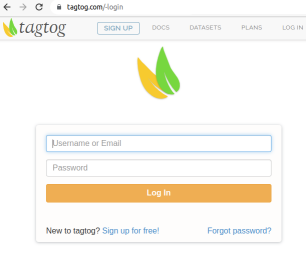








3) Crie um projeto em "New Project":

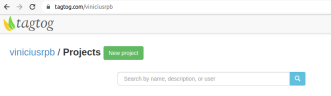

4) Cadastre as labels no menu "Settings" => "Document Labels";

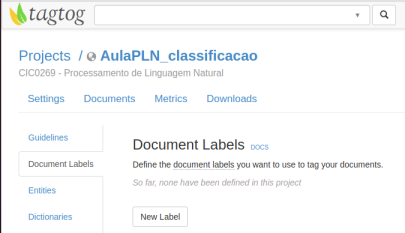


* Agora clique em "New Label", coloque a opção enumerate e coloque os valores de labels separados por vírgula. Por exemplo: "positivo, negativo, neutro".


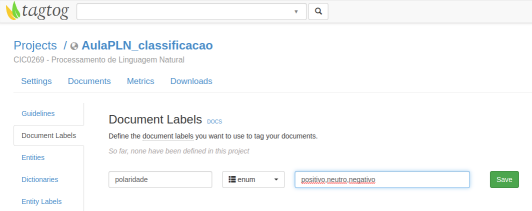

5) Cadastre os anotadores a partir do e-mail cadastrados para cada um. Coloque o papel de cada um como sendo *reviewer*.


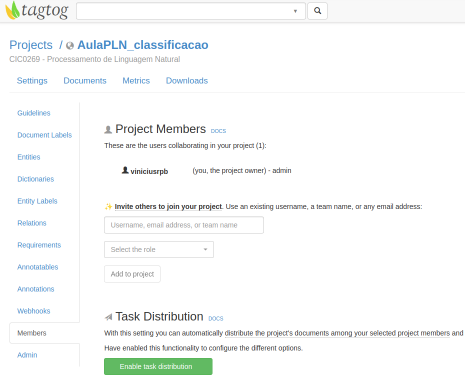

6) Em seguida, habilite a distribuição de tarefas e atribua a quantidade de documentos por anotador que julgar necessário. Para viabilizar o cálculo das métricas de concordância, coloque no mínimo 2 anotadores por documento.


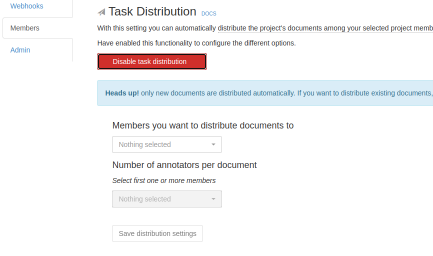

7) Faça o upload dos documentos como um arquivo csv ou no formato de sua conveniência. A primeira linha do csv deve ser o nome do atributo e as linhas seguintes se referem ao texto a ser anotado

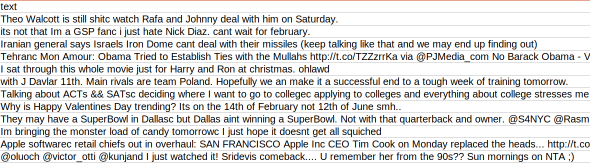






8) Ao importar o csv, já indique os anotadores que participarão do processo de anotação:

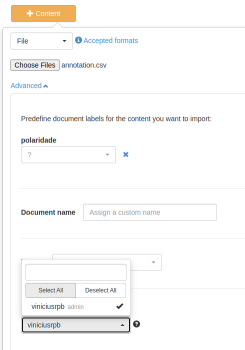



9) Veja como fica a tela após o carregamento do arquivo annotation.csv (disponível [aqui]()).

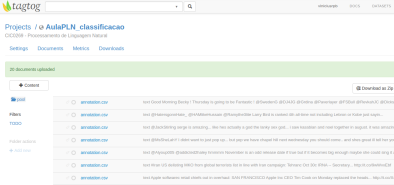

10) Agora os anotadores já podem acessar o projeto pelos links enviados nos seus respectivos emails. A tela que será apresentada é a seguinte:

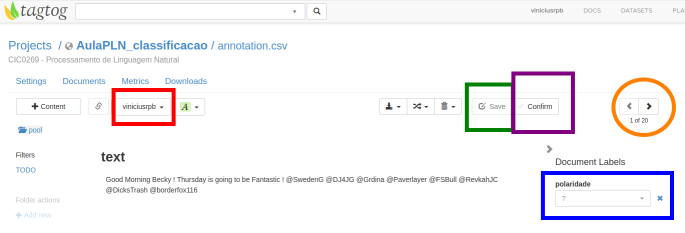


Pode-se observar na tela:


*   Em vermelho: login do anotador
*   Em azul: local onde o anotador indica o label do texto apresentado na tela
*   Em laranja: ir para o próximo (>) documento ou para o anterior (<)
*   Em verde: salvar a anotação feita
*   Em roxo: confirmar a anotação realizada após o processo de revisão por pares





## 10.2 - Métricas de Concordâncias entre Anotadores

In [1]:
!pip install krippendorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import krippendorff
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score

Veja o seguinte exemplo (colocamos em um objeto DataFrame apenas para facilitar o entendimento):

In [3]:
corpus = []

corpus.append(["O ser humano fede!","negativo","negativo","negativo"])
corpus.append(["Onde existem flores, existe vida!","positivo","positivo","positivo"])
corpus.append(["Choveu ontem lá no ICC","neutro","neutro","negativo"])
corpus.append(["Minha sogra me visitou ontem","negativo","negativo","neutro"])
corpus.append(["Agora são 13 horas e 14 minutos","positivo","neutro","negativo"])

df = pd.DataFrame(corpus, columns = ['texto','Label - Anotador 1','Label - Anotador 2','Label - Anotador 3'])

In [4]:
df

,texto,Label - Anotador 1,Label - Anotador 2,Label - Anotador 3
0,O ser humano fede!,negativo,negativo,negativo
1,"Onde existem flores, existe vida!",positivo,positivo,positivo
2,Choveu ontem lá no ICC,neutro,neutro,negativo
3,Minha sogra me visitou ontem,negativo,negativo,neutro
4,Agora são 13 horas e 14 minutos,positivo,neutro,negativo


Alterando a representação do DataFrame para o formato de entrada de uma tabela em que:


*   Cada linha é um anotador
*   Cada coluna é um documento
*   Cada célula da tabela é o rótulo (\textit{label}) $v_{ij}$ atribuído pelo anotador $i$ para o documento $j$


    [
        {unit1:value, unit2:value, ...},  # coder 1
        {unit1:value, unit3:value, ...},   # coder 2
        ...                            # more coders
    ]



In [5]:
corpus_transpose = []

for atrib in df:

    if atrib != 'texto':

        lista = np.array(df[atrib])
        corpus_transpose.append(list(lista.T))

Como resultado, obtemos uma matriz em que cada linha se refere a um anotador e as colunas os labels atribuídos para cada documento:

In [6]:
corpus_transpose

[['negativo', 'positivo', 'neutro', 'negativo', 'positivo'],
 ['negativo', 'positivo', 'neutro', 'negativo', 'neutro'],
 ['negativo', 'positivo', 'negativo', 'neutro', 'negativo']]

Podemos também obter a representação inteira dos labels ao invés de strings:

In [7]:
mapping = {'positivo' : 2, 'neutro' : 1, 'negativo' : 0}

In [8]:
corpus_transpose_int = []

for labels in corpus_transpose:
    t = []
    for doc in labels:
        t.append(mapping[doc])
    corpus_transpose_int.append(t)

corpus_transpose_int

[[0, 2, 1, 0, 2], [0, 2, 1, 0, 1], [0, 2, 0, 1, 0]]

### Coeficiente de Cohen's Kappa $\kappa$

Lembre-se que o coeficiente Cohen's Kappa calcula a concordância entre dois anotadores apenas:

In [9]:
print(cohen_kappa_score(corpus_transpose[0], corpus_transpose[1]))

0.7058823529411765


### Coeficiente de Krippendorff



Exemplo da documentação: com valores ausentes (*), isto é, o anotador (por algum motivo) não atribui rótulos

In [10]:
reliability_data_str = ["*    *    *    *    *    3    4    1    2    1    1    3    3    *    3",  # anotador A
                        "1    *    2    1    3    3    4    3    *    *    *    *    *    *    *",  # anotador B
                        "*    *    2    1    3    4    4    *    2    1    1    3    3    *    4"]  # anotador C
print("\n".join(reliability_data_str))

*    *    *    *    *    3    4    1    2    1    1    3    3    *    3
1    *    2    1    3    3    4    3    *    *    *    *    *    *    *
*    *    2    1    3    4    4    *    2    1    1    3    3    *    4


In [11]:
reliability_data = [[np.nan if v == "*" else int(v) for v in coder.split()] for coder in reliability_data_str]
reliability_data

[[nan, nan, nan, nan, nan, 3, 4, 1, 2, 1, 1, 3, 3, nan, 3],
 [1, nan, 2, 1, 3, 3, 4, 3, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, 2, 1, 3, 4, 4, nan, 2, 1, 1, 3, 3, nan, 4]]

Agora com matriz de contagem

In [12]:
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=reliability_data,
                                                                          level_of_measurement="nominal"))

print("From value counts:\n")

value_counts = np.array([[1, 0, 0, 0],
                         [0, 0, 0, 0],
                         [0, 2, 0, 0],
                         [2, 0, 0, 0],
                         [0, 0, 2, 0],
                         [0, 0, 2, 1],
                         [0, 0, 0, 3],
                         [1, 0, 1, 0],
                         [0, 2, 0, 0],
                         [2, 0, 0, 0],
                         [2, 0, 0, 0],
                         [0, 0, 2, 0],
                         [0, 0, 2, 0],
                         [0, 0, 0, 0],
                         [0, 0, 1, 1]])
print(value_counts)
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(value_counts=value_counts,
                                                                          level_of_measurement="nominal"))

Krippendorff's alpha for nominal metric:  0.691358024691358
From value counts:

[[1 0 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [2 0 0 0]
 [0 0 2 0]
 [0 0 2 1]
 [0 0 0 3]
 [1 0 1 0]
 [0 2 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 2 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 1 1]]
Krippendorff's alpha for nominal metric:  0.691358024691358


## 10.3 - Avaliação por Similaridade entre Textos

In [13]:
texto_anotador_a = "uma parte de um texto"
texto_anotador_b = "uma parte de um texto"
texto_anotador_c = "uma parte de um texto que vai longe"
texto_anotador_d = "Visando obter uma parte de um texto que vai longe"

Edit Distance

Coeficiente de Jaccard

SyntaxError: ignored